In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.12.24']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
1034,Afghanistan,22.12.24,207310
2080,Africa,22.12.24,12463137
3114,Albania,22.12.24,333749
4148,Algeria,22.12.24,271194
5176,Andorra,22.12.24,47686
...,...,...,...
240994,Wallis and Futuna,22.12.24,3415
242063,World,22.12.24,656864989
243052,Yemen,22.12.24,11945
244064,Zambia,22.12.24,334021


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
1034,Afghanistan,22.12.24,207310
3114,Albania,22.12.24,333749
4148,Algeria,22.12.24,271194
5176,Andorra,22.12.24,47686
6186,Angola,22.12.24,104973
...,...,...,...
239194,Vietnam,22.12.24,11524202
240994,Wallis and Futuna,22.12.24,3415
243052,Yemen,22.12.24,11945
244064,Zambia,22.12.24,334021


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
231394,United States,22.12.24,100371552
100789,India,22.12.24,44678330
77662,France,22.12.24,39158905
82804,Germany,22.12.24,37211951
30862,Brazil,22.12.24,36092845
205374,South Korea,22.12.24,28659055
111169,Japan,22.12.24,28138882
109082,Italy,22.12.24,25021606
230326,United Kingdom,22.12.24,24135084
181904,Russia,22.12.24,21450076


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
224006,Turkey,22.12.24,16919638
207426,Spain,22.12.24,13670037
166724,Oceania,22.12.24,13545533
239194,Vietnam,22.12.24,11524202
13499,Australia,22.12.24,11077191
...,...,...,...
146856,Montserrat,22.12.24,1403
102869,International,22.12.24,721
237111,Vatican,22.12.24,29
161246,North Korea,22.12.24,1


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.12.24', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_18724\4289697047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.12.24', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.12.24,100371552
India,22.12.24,44678330
France,22.12.24,39158905
Germany,22.12.24,37211951
Brazil,22.12.24,36092845
South Korea,22.12.24,28659055
Japan,22.12.24,28138882
Italy,22.12.24,25021606
United Kingdom,22.12.24,24135084


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.12.24,100371552
1,India,22.12.24,44678330
2,France,22.12.24,39158905
3,Germany,22.12.24,37211951
4,Brazil,22.12.24,36092845
5,South Korea,22.12.24,28659055
6,Japan,22.12.24,28138882
7,Italy,22.12.24,25021606
8,United Kingdom,22.12.24,24135084
9,Russia,22.12.24,21450076


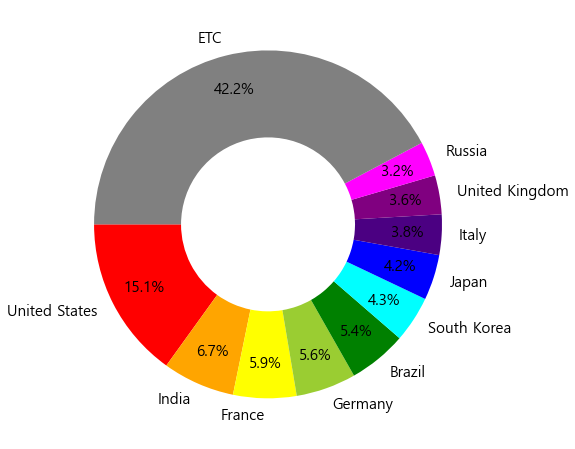

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()